In [6]:
# Asegúrate de que la ruta al archivo sea correcta
include("ClusterProperties.jl")
using .ClusterPhysicsModule



In [7]:
params = Dict(
    "temperature" => 668,
    "activation_energy" => 52920.2,  # Convertir a joules si es necesario
    "diffusivity_factor" => 2e-9,
    "jump_distance" => 4.6e-10,
    "molar_mass" => 51.9961*1e-3,
    "mass_density" => 7.19*1e3,
    "melting_point" => 2130,
    "heat_fusion" => 20.48 * 1e3,  # Asegurarse de que las unidades sean consistentes
    "sigma" =>  0.15,
    "supersaturation_ratio" => 1.1,
    "method" => "melting"
)


Dict{String, Any} with 11 entries:
  "method"                => "melting"
  "mass_density"          => 7190.0
  "temperature"           => 668
  "sigma"                 => 0.15
  "diffusivity_factor"    => 2.0e-9
  "supersaturation_ratio" => 1.1
  "melting_point"         => 2130
  "heat_fusion"           => 20480.0
  "molar_mass"            => 0.0519961
  "jump_distance"         => 4.6e-10
  "activation_energy"     => 52920.2

In [8]:
cluster_physics = ClusterPhysics(params)

ClusterPhysics(668.0, 52920.2, 2.0e-9, 4.6e-10, 0.051996099999999996, 7190.0, 2130.0, 20480.0, 0.15, 1.1, "melting")

In [9]:
bulk_free_energy(cluster_physics)

-2.3342470525794928e-20

In [10]:
MAX_NUMBER_MOLECULES = 5000

free_energies = zeros(Float64, MAX_NUMBER_MOLECULES)
free_energies_modified = zeros(Float64,MAX_NUMBER_MOLECULES)

cluster_physics = ClusterPhysics(params)
for i in 1:MAX_NUMBER_MOLECULES
    free_energies[i] = total_free_energy(cluster_physics, i)
    free_energies_modified[i] = rectified_total_free_energy(cluster_physics, i)
end

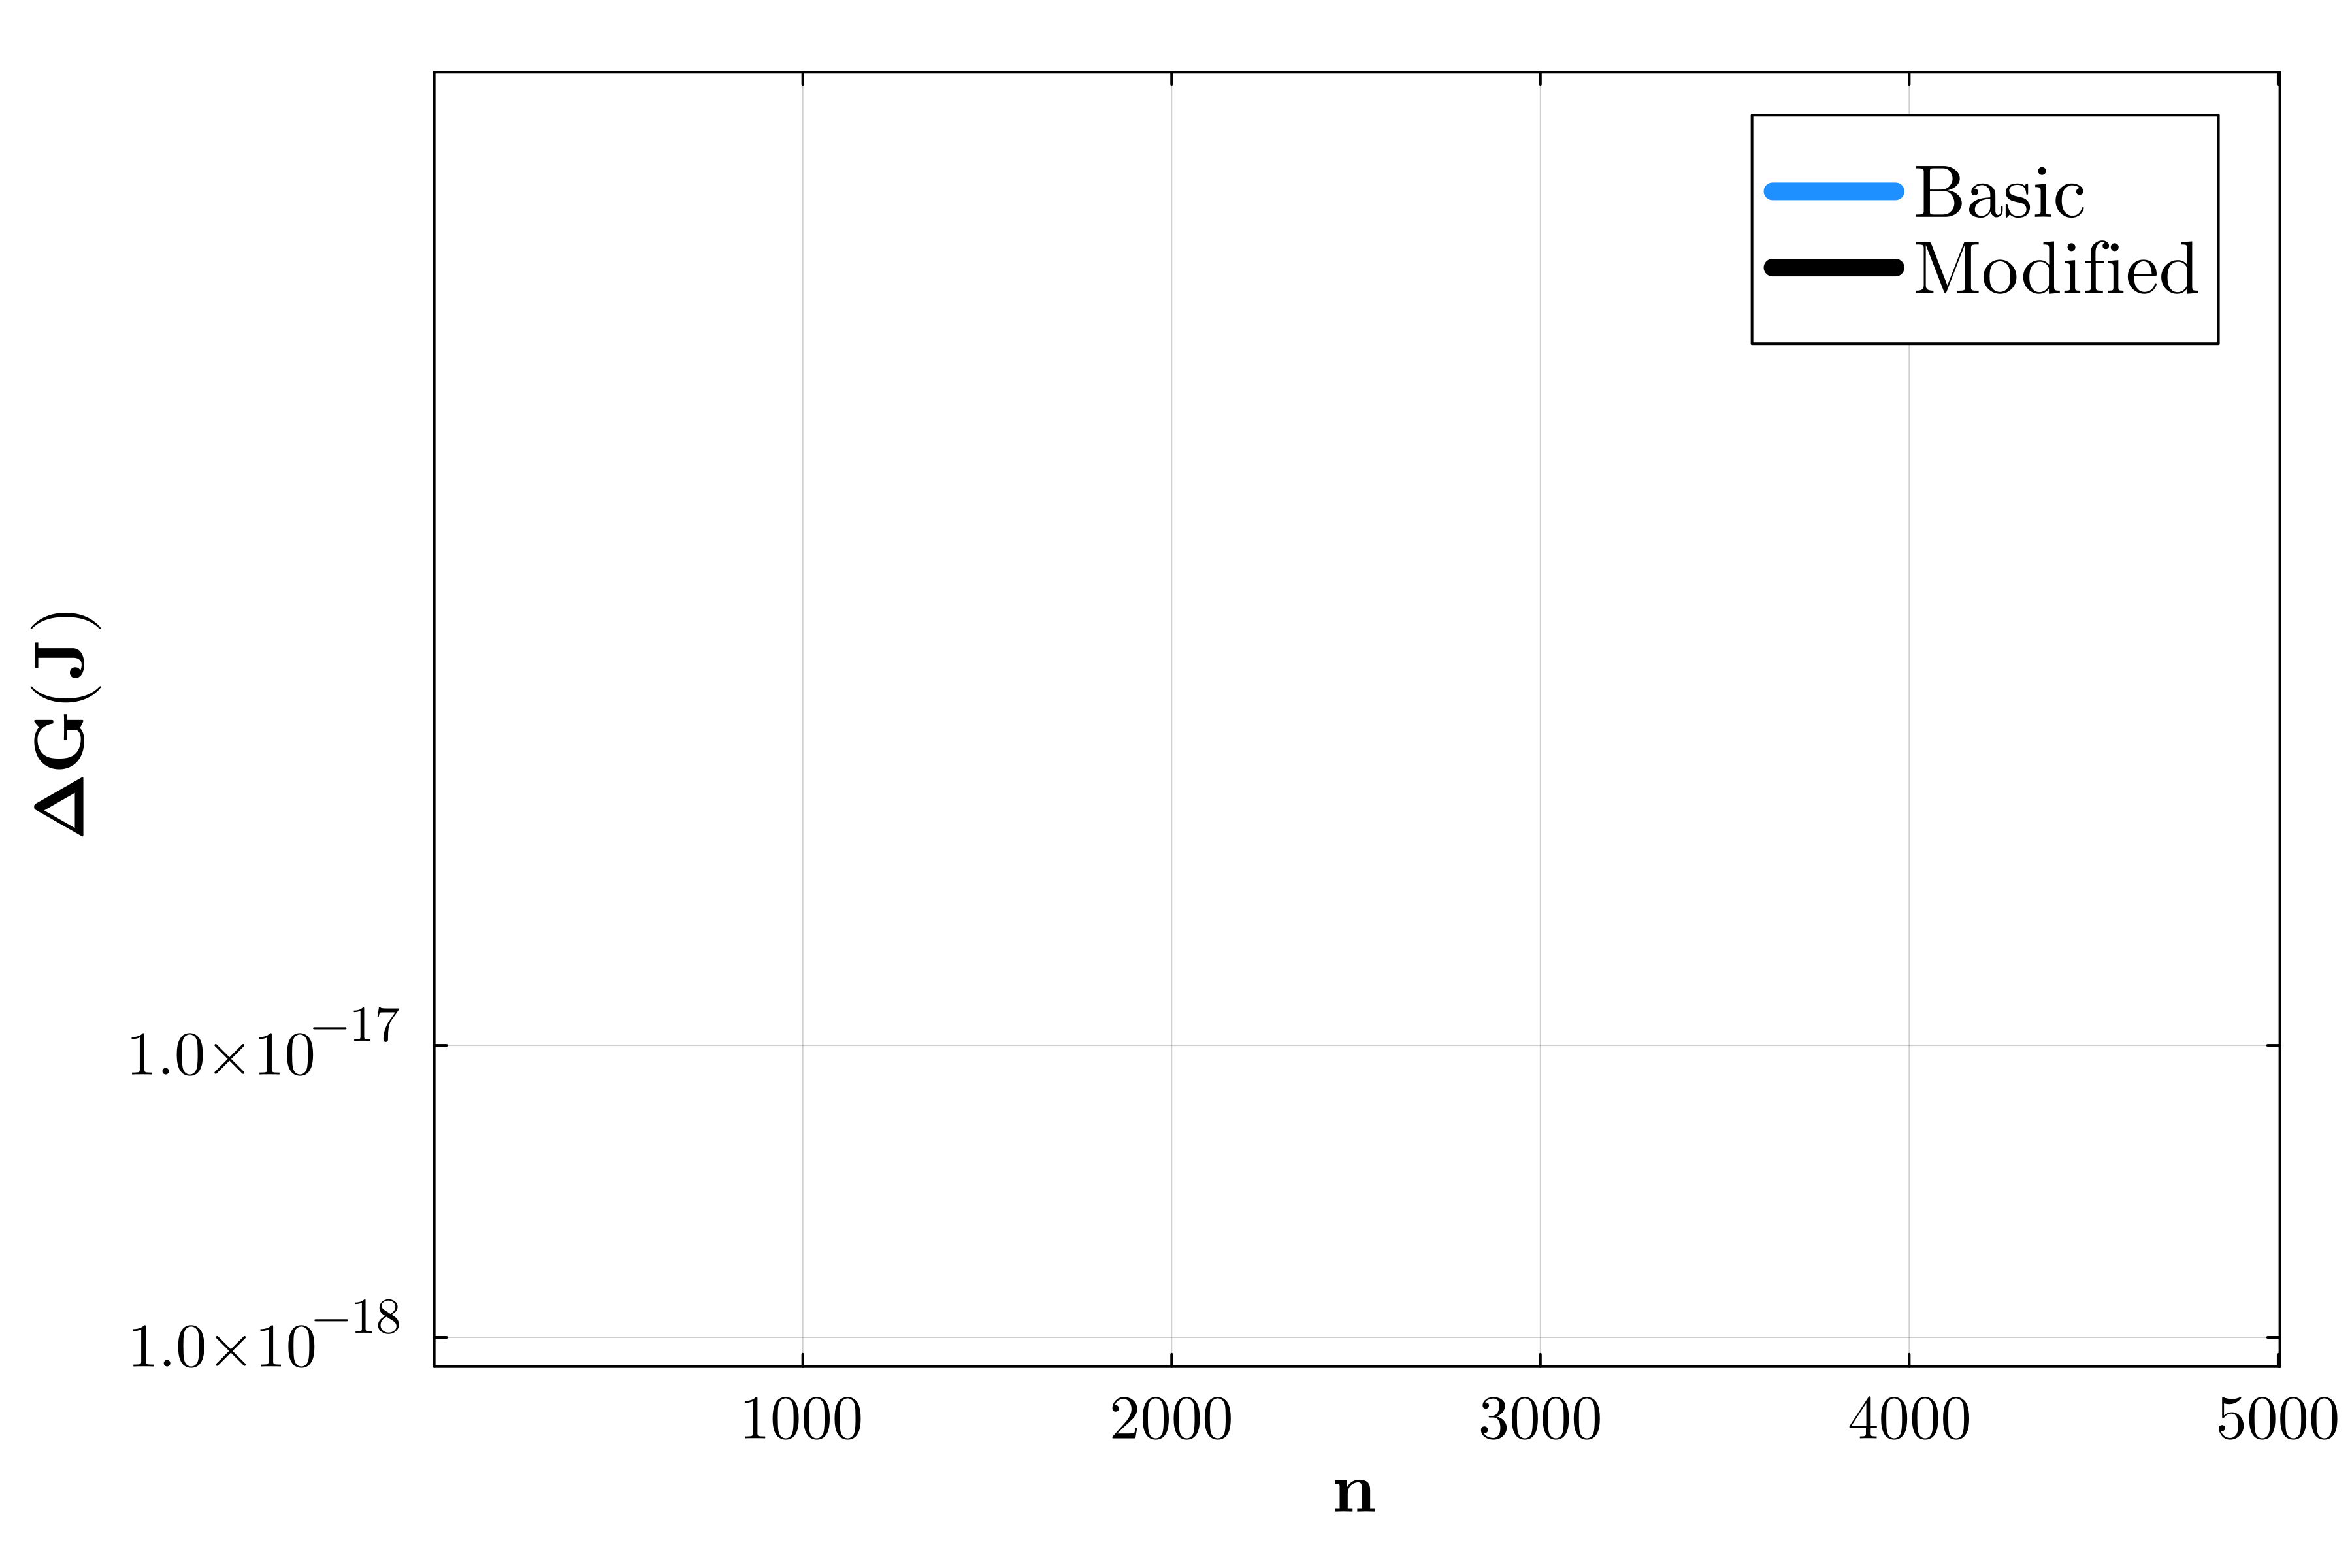

In [11]:
using Plots
# Asegúrate de tener LaTeXStrings para usar LaTeX en etiquetas y títulos
using LaTeXStrings

# Establece el backend y el tamaño del gráfico
gr(size=(600, 600))

number_molecules_array = collect(1:MAX_NUMBER_MOLECULES)

# Define colores más atractivos
colores = [:dodgerblue, :coral]

# Ajustes de estilo global para las gráficas
default(
    framestyle=:box,
    legend=:topright,
    line=(:solid, 3),  # Aumenta el grosor de las líneas
    fontfamily="Computer Modern",  # Esto es lo más cercano a un estilo LaTeX clásico
    size=(900, 600),  # Ajusta el tamaño de la gráfica aquí si no se ajustó antes
    dpi=400
)


# Escala de los ejes y etiquetas en formato LaTeX con un tamaño de fuente más grande
plot(number_molecules_array, free_energies,  label="Basic",
    xlims=(1, MAX_NUMBER_MOLECULES+5), ylims=(1e-19,4e-17), yticks=10.0 .^ (-18:1:-15),
    legendfontsize=12, titlefontsize=14, guidefontsize=12, tickfontsize=10,
    margin=5Plots.mm,
    color=colores[1])

plot!(number_molecules_array, free_energies_modified, label="Modified",color = :black, linestyle=:dash,
)

# Personalizar aún más con LaTeXStrings si es necesario
plot!(xlabel=L"\mathbf{n}", ylabel=L"\mathbf{\Delta G (J)}",
      legendfontsize=18, guidefontsize=18, tickfontsize=15)

# Mostrar el gráfico


In [1]:
include("ClusterDynamics.jl") # Si guardaste el código en un archivo separado.

simulate (generic function with 1 method)

In [2]:
params = Dict(
    "temperature" => 750,
    "activation_energy" => 52920.2,  # Convertir a joules si es necesario
    "diffusivity_factor" => 2e-9,
    "jump_distance" => 4.6e-10,
    "molar_mass" => 150.05*1e-3,
    "mass_density" => 2500,
    "melting_point" => 1300,
    "heat_fusion" => 52 * 1e3,  # Asegurarse de que las unidades sean consistentes
    "sigma" => 0.15,
    "supersaturation_ratio" => 1.1,
    "method" => "melting"
)


Dict{String, Any} with 11 entries:
  "method"                => "melting"
  "mass_density"          => 2500
  "temperature"           => 750
  "sigma"                 => 0.15
  "diffusivity_factor"    => 2.0e-9
  "supersaturation_ratio" => 1.1
  "melting_point"         => 1300
  "heat_fusion"           => 52000.0
  "molar_mass"            => 0.15005
  "jump_distance"         => 4.6e-10
  "activation_energy"     => 52920.2

In [3]:
MAX_NUMBER_MOLECULES = 100
number_clusters_start = 2
#dt = 1e-8/unbiased_jump_rate(cluster_physics)
dt = 1e18

dn = JuliaClusterDynamics(params, 1e7, dt, number_clusters_start, MAX_NUMBER_MOLECULES, "open");

In [4]:
# Llama a simulate! para ejecutar la simulación y almacenar la solución
@time solution = simulate(dn; method=Rodas4(), rtol=1e-8, atol=1e-8);


  2.340083 seconds (1.79 M allocations: 131.133 MiB, 2.65% gc time, 90.07% compilation time)


In [5]:
density_equilibrium = zeros(Float64, MAX_NUMBER_MOLECULES)
cluster_physics = ClusterPhysics(params)
for i in 1:MAX_NUMBER_MOLECULES
    density_equilibrium[i] = number_density_equilibrium(cluster_physics, i)
end

GKS: could not find font Latin Modern Roman.ttf
┌ Warning: Invalid negative or zero value 0.0 found at series index 3 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 3 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


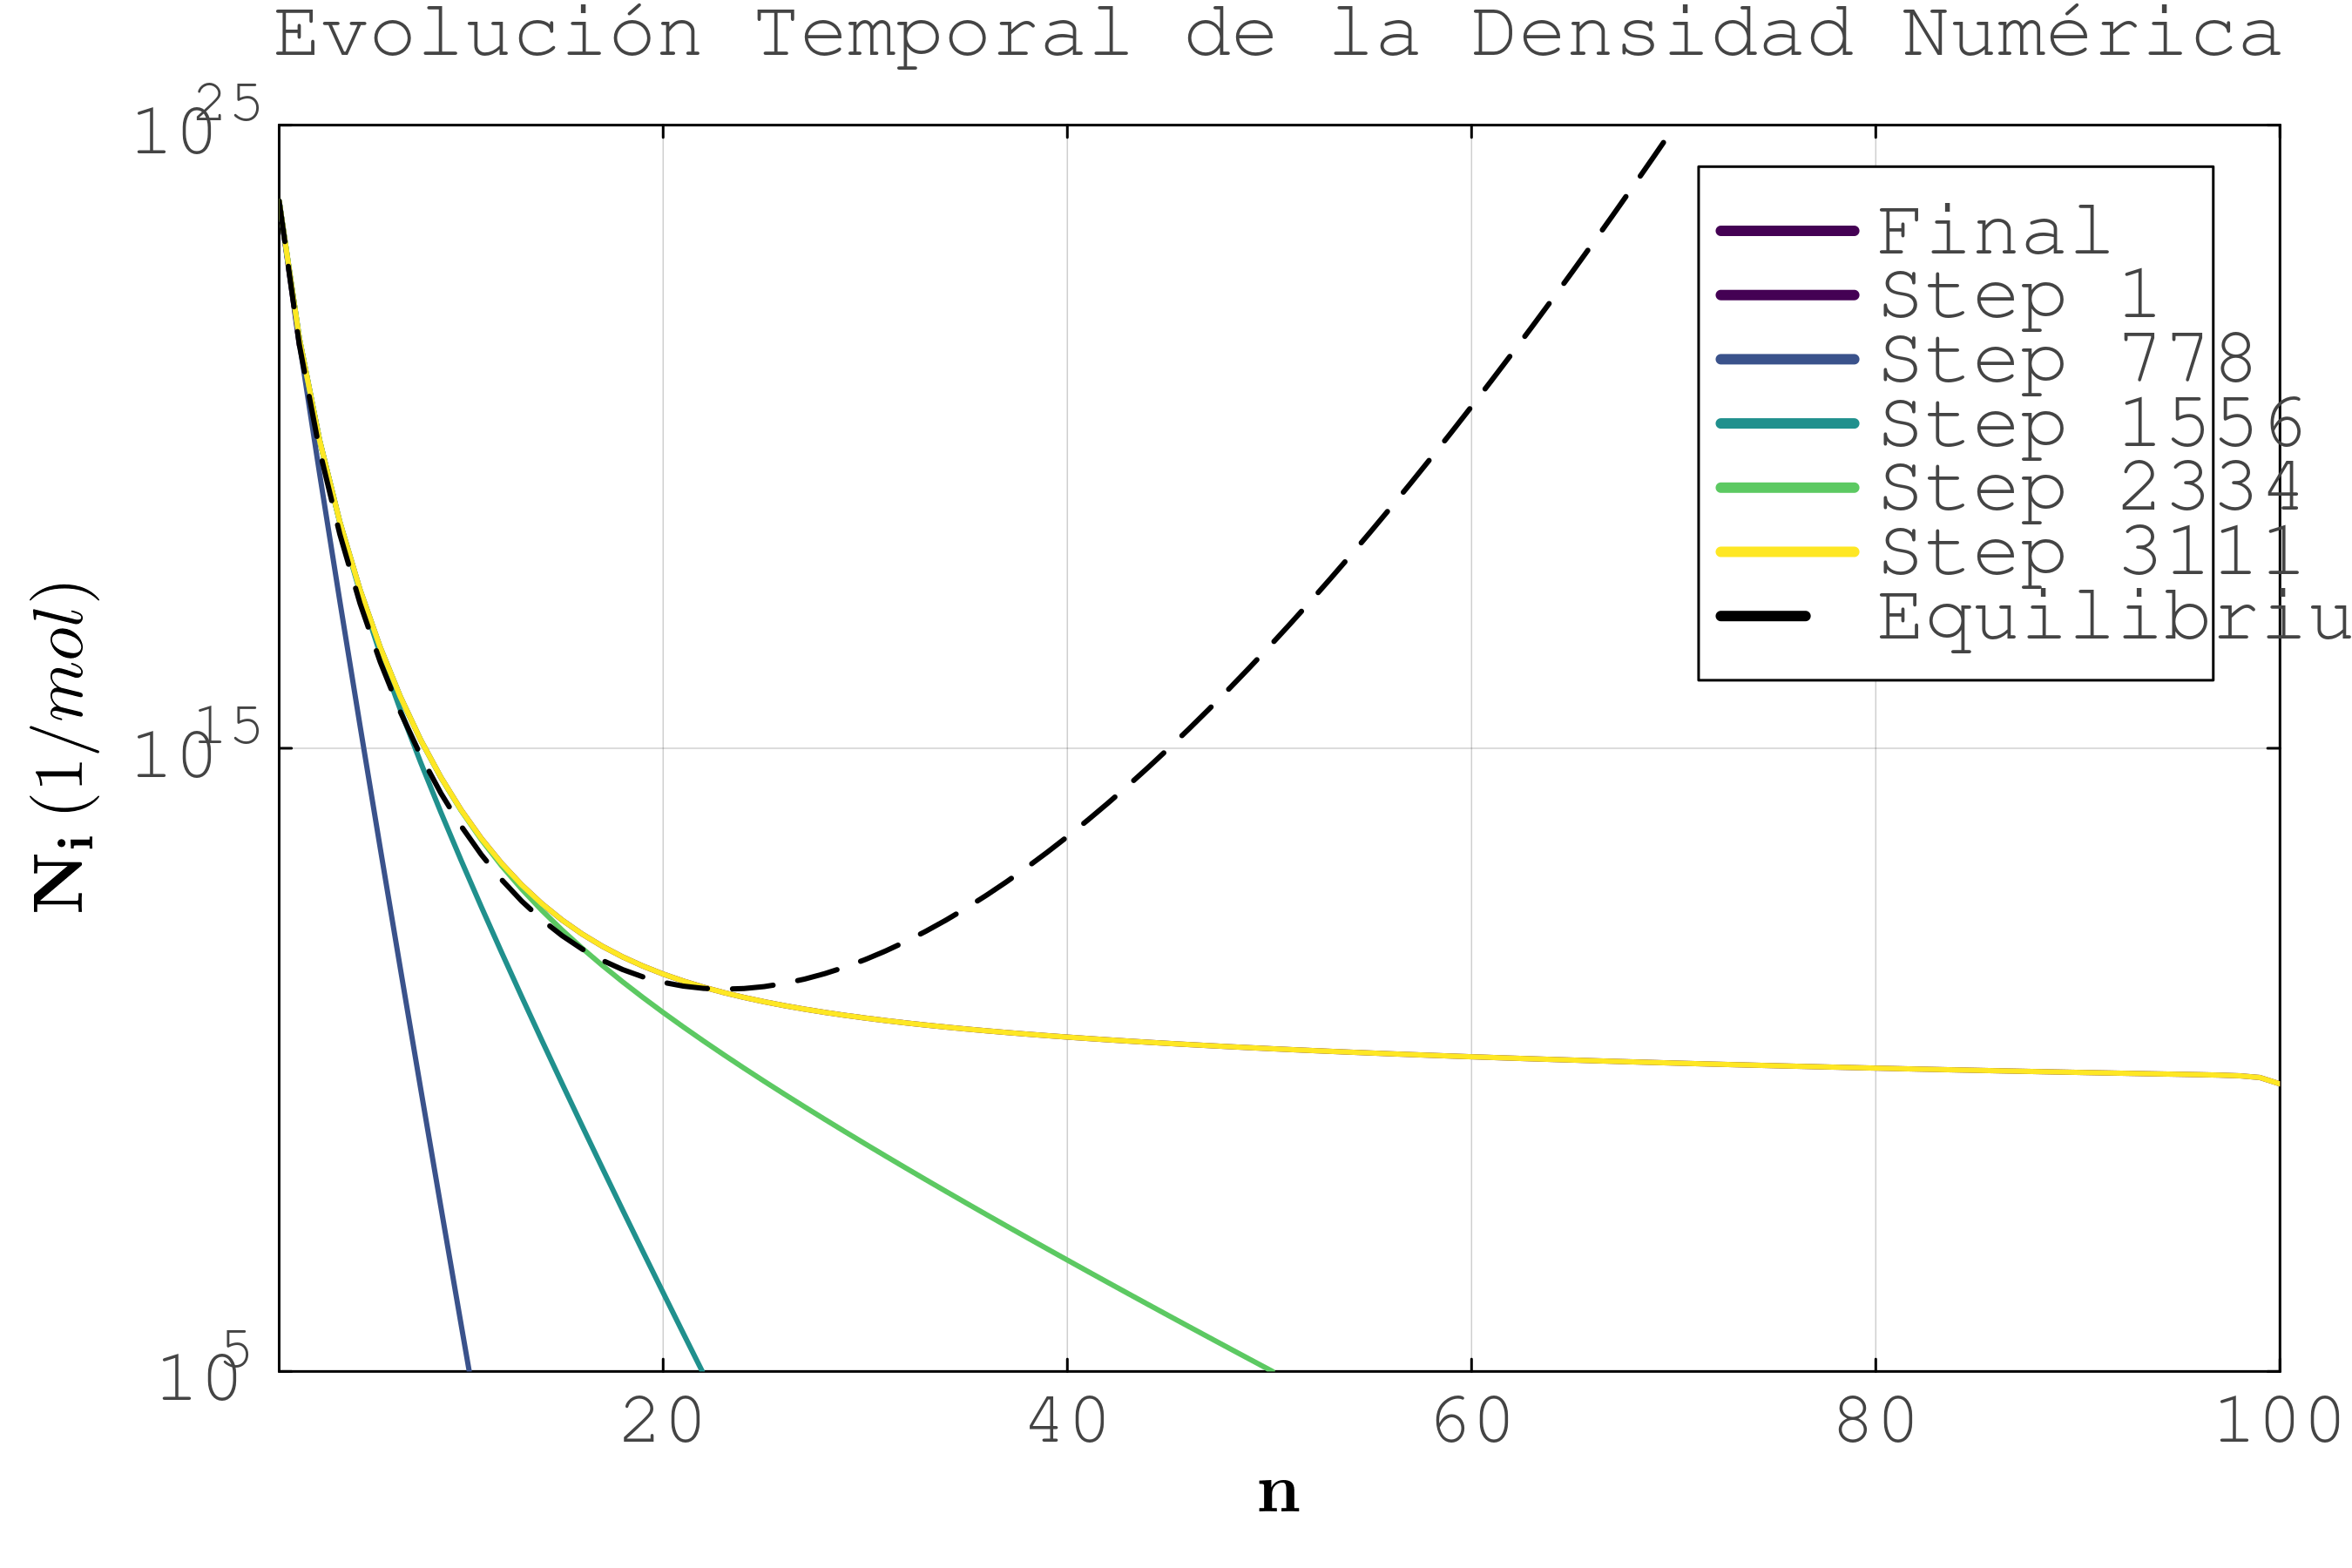

┌ Warning: Invalid negative or zero value 0.0 found at series index 3 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


In [6]:
using Plots
using LaTeXStrings

# Asumiendo que tienes los arreglos `solution` y `density_equilibrium` definidos.

# Establece el backend de Plots y el tamaño del gráfico (esto se configurará más adelante también)
gr(size=(900, 600))

# Definir el rango de números de moléculas
number_molecules_array = collect(1:MAX_NUMBER_MOLECULES)

# Define una paleta de colores elegante y consistente
colores = palette(:viridis, 5)  # Usa una paleta predefinida para coherencia visual

# Ajustes de estilo global para las gráficas
default(
    framestyle=:box,
    legend=:topright,
    line=(:solid, 2),  # Líneas un poco más finas para un aspecto más refinado
    fontfamily="Latin Modern Roman",  # Estilo de fuente que se asemeja a LaTeX
    size=(900, 600),  # Tamaño del gráfico
    dpi=300,  # DPI adecuado para publicaciones de alta calidad
    legendfontsize=10, titlefontsize=16, guidefontsize=14, tickfontsize=12,
    margin=5Plots.mm,
    xlabel=L"\mathbf{n}",  # Uso de LaTeXStrings para etiquetas
    ylabel=L"\mathbf{N_i} \, (1/mol)",
    title="Evolución Temporal de la Densidad Numérica"
)

# Creación de la gráfica con escalas logarítmicas y etiquetas personalizadas
p = plot(number_molecules_array, solution[:, end], 
         label="Final", 
         yscale=:log10, 
         xlims=(1, MAX_NUMBER_MOLECULES), 
         ylims=(1e5,1e25),
         yticks=10.0 .^ (5:10:25),
         color=colores[1], 
         legend=true)

# Selecciona puntos de tiempo equiespaciados para mostrar
final_time_index = size(solution, 2)
tiempos = Int[1, 1 + div(final_time_index, 4), 1 + div(final_time_index, 2), final_time_index - div(final_time_index, 4), final_time_index]

# Añade las líneas para los tiempos seleccionados
for (i, tiempo) in enumerate(tiempos)
    plot!(number_molecules_array, solution[:, tiempo], 
          label="Step $tiempo", 
          yscale=:log10, 
          color=colores[i])
end

# Añade la línea de equilibrio con estilo diferenciado
plot!(number_molecules_array, density_equilibrium, 
      label="Equilibrium", 
      yscale=:log10, 
      color=:black, 
      linestyle=:dash)

# Ajustes finales de etiquetas y títulos con LaTeXStrings
plot!(xlabel=L"\mathbf{n}", 
      ylabel=L"\mathbf{N_i} \, (1/mol)", 
      title="Evolución Temporal de la Densidad Numérica",
      legendfontsize=16, guidefontsize=18, tickfontsize=15)


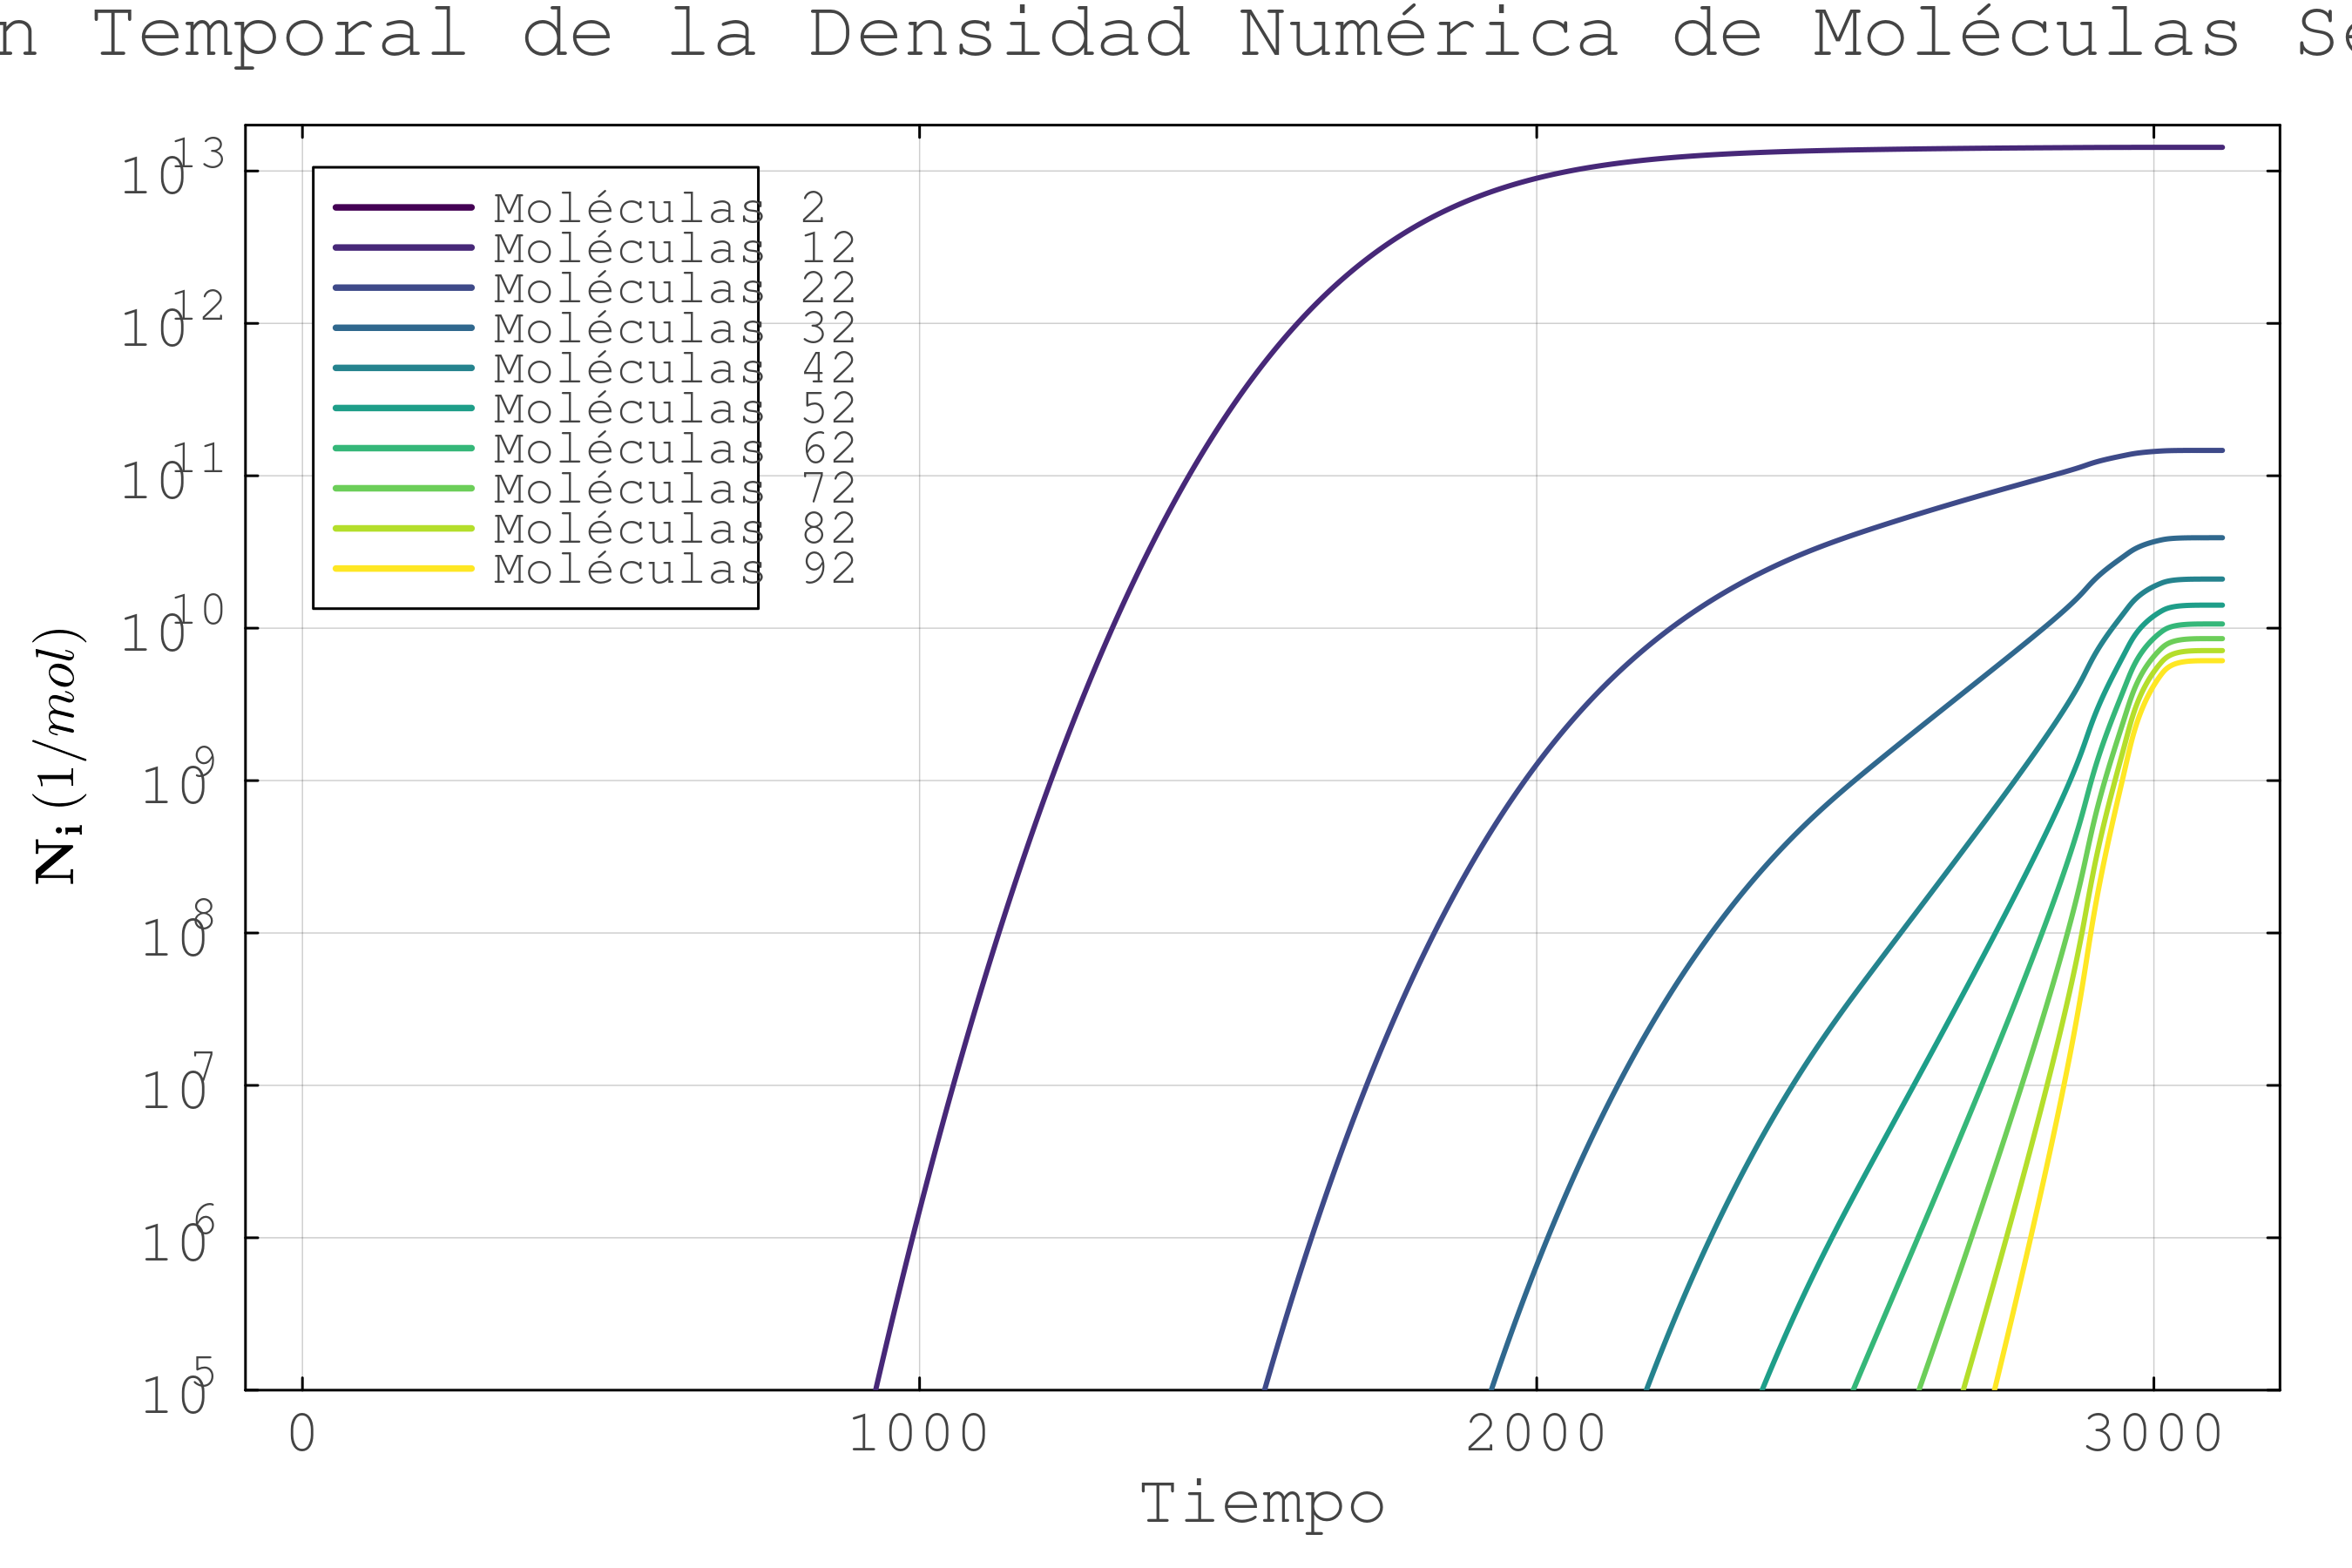

In [21]:
using Plots
using LaTeXStrings

# Asegúrate de que tienes definidos `solution`, `density_equilibrium`, y `MAX_NUMBER_MOLECULES`.

gr(size=(900, 600))  # Establece el backend de Plots y el tamaño del gráfico

# Selecciona un rango de números de moléculas equiespaciados
num_molecules_to_plot = 2:10:MAX_NUMBER_MOLECULES  # Ajusta el paso según la densidad deseada

# Define el eje del tiempo basado en las dimensiones de tu solución
time_steps = size(solution, 2)
tiempo = collect(1:time_steps)

# Establece colores para cada número de moléculas seleccionado
colores = palette(:viridis, length(num_molecules_to_plot))

# Ajustes de estilo global para las gráficas
default(
    framestyle=:box,
    legend=:topright,
    line=(:solid, 2),
    fontfamily="Latin Modern Roman",
    size=(900, 600),
    dpi=300,
    legendfontsize=10, titlefontsize=16, guidefontsize=14, tickfontsize=12,
    margin=5Plots.mm,
    xlabel="Tiempo",
    ylabel=L"\mathbf{N_i} \, (1/mol)",
    ylims=(1e5,2e13),
    yticks=10.0 .^ (3:1:14),
    yscale = :log10,
    title="Evolución Temporal de la Densidad Numérica de Moléculas Seleccionadas"
)

# Inicia la gráfica (puede ser necesario ajustar según tus datos)
p = plot(legend=:topleft)

# Añade las series para cada número de moléculas seleccionado
for (index, n) in enumerate(num_molecules_to_plot)
    plot!(tiempo, [solution[n, t] for t in tiempo], label="Moléculas $n", color=colores[index])
end


# Ajustes finales y mostrar la gráfica
plot!(xlabel="Tiempo", ylabel=L"\mathbf{N_i} \, (1/mol)", title="Evolución Temporal de la Densidad Numérica de Moléculas Seleccionadas", legendfontsize=10, guidefontsize=14, tickfontsize=12)


In [15]:
log10(total_evolution[1])

21.47032719885787

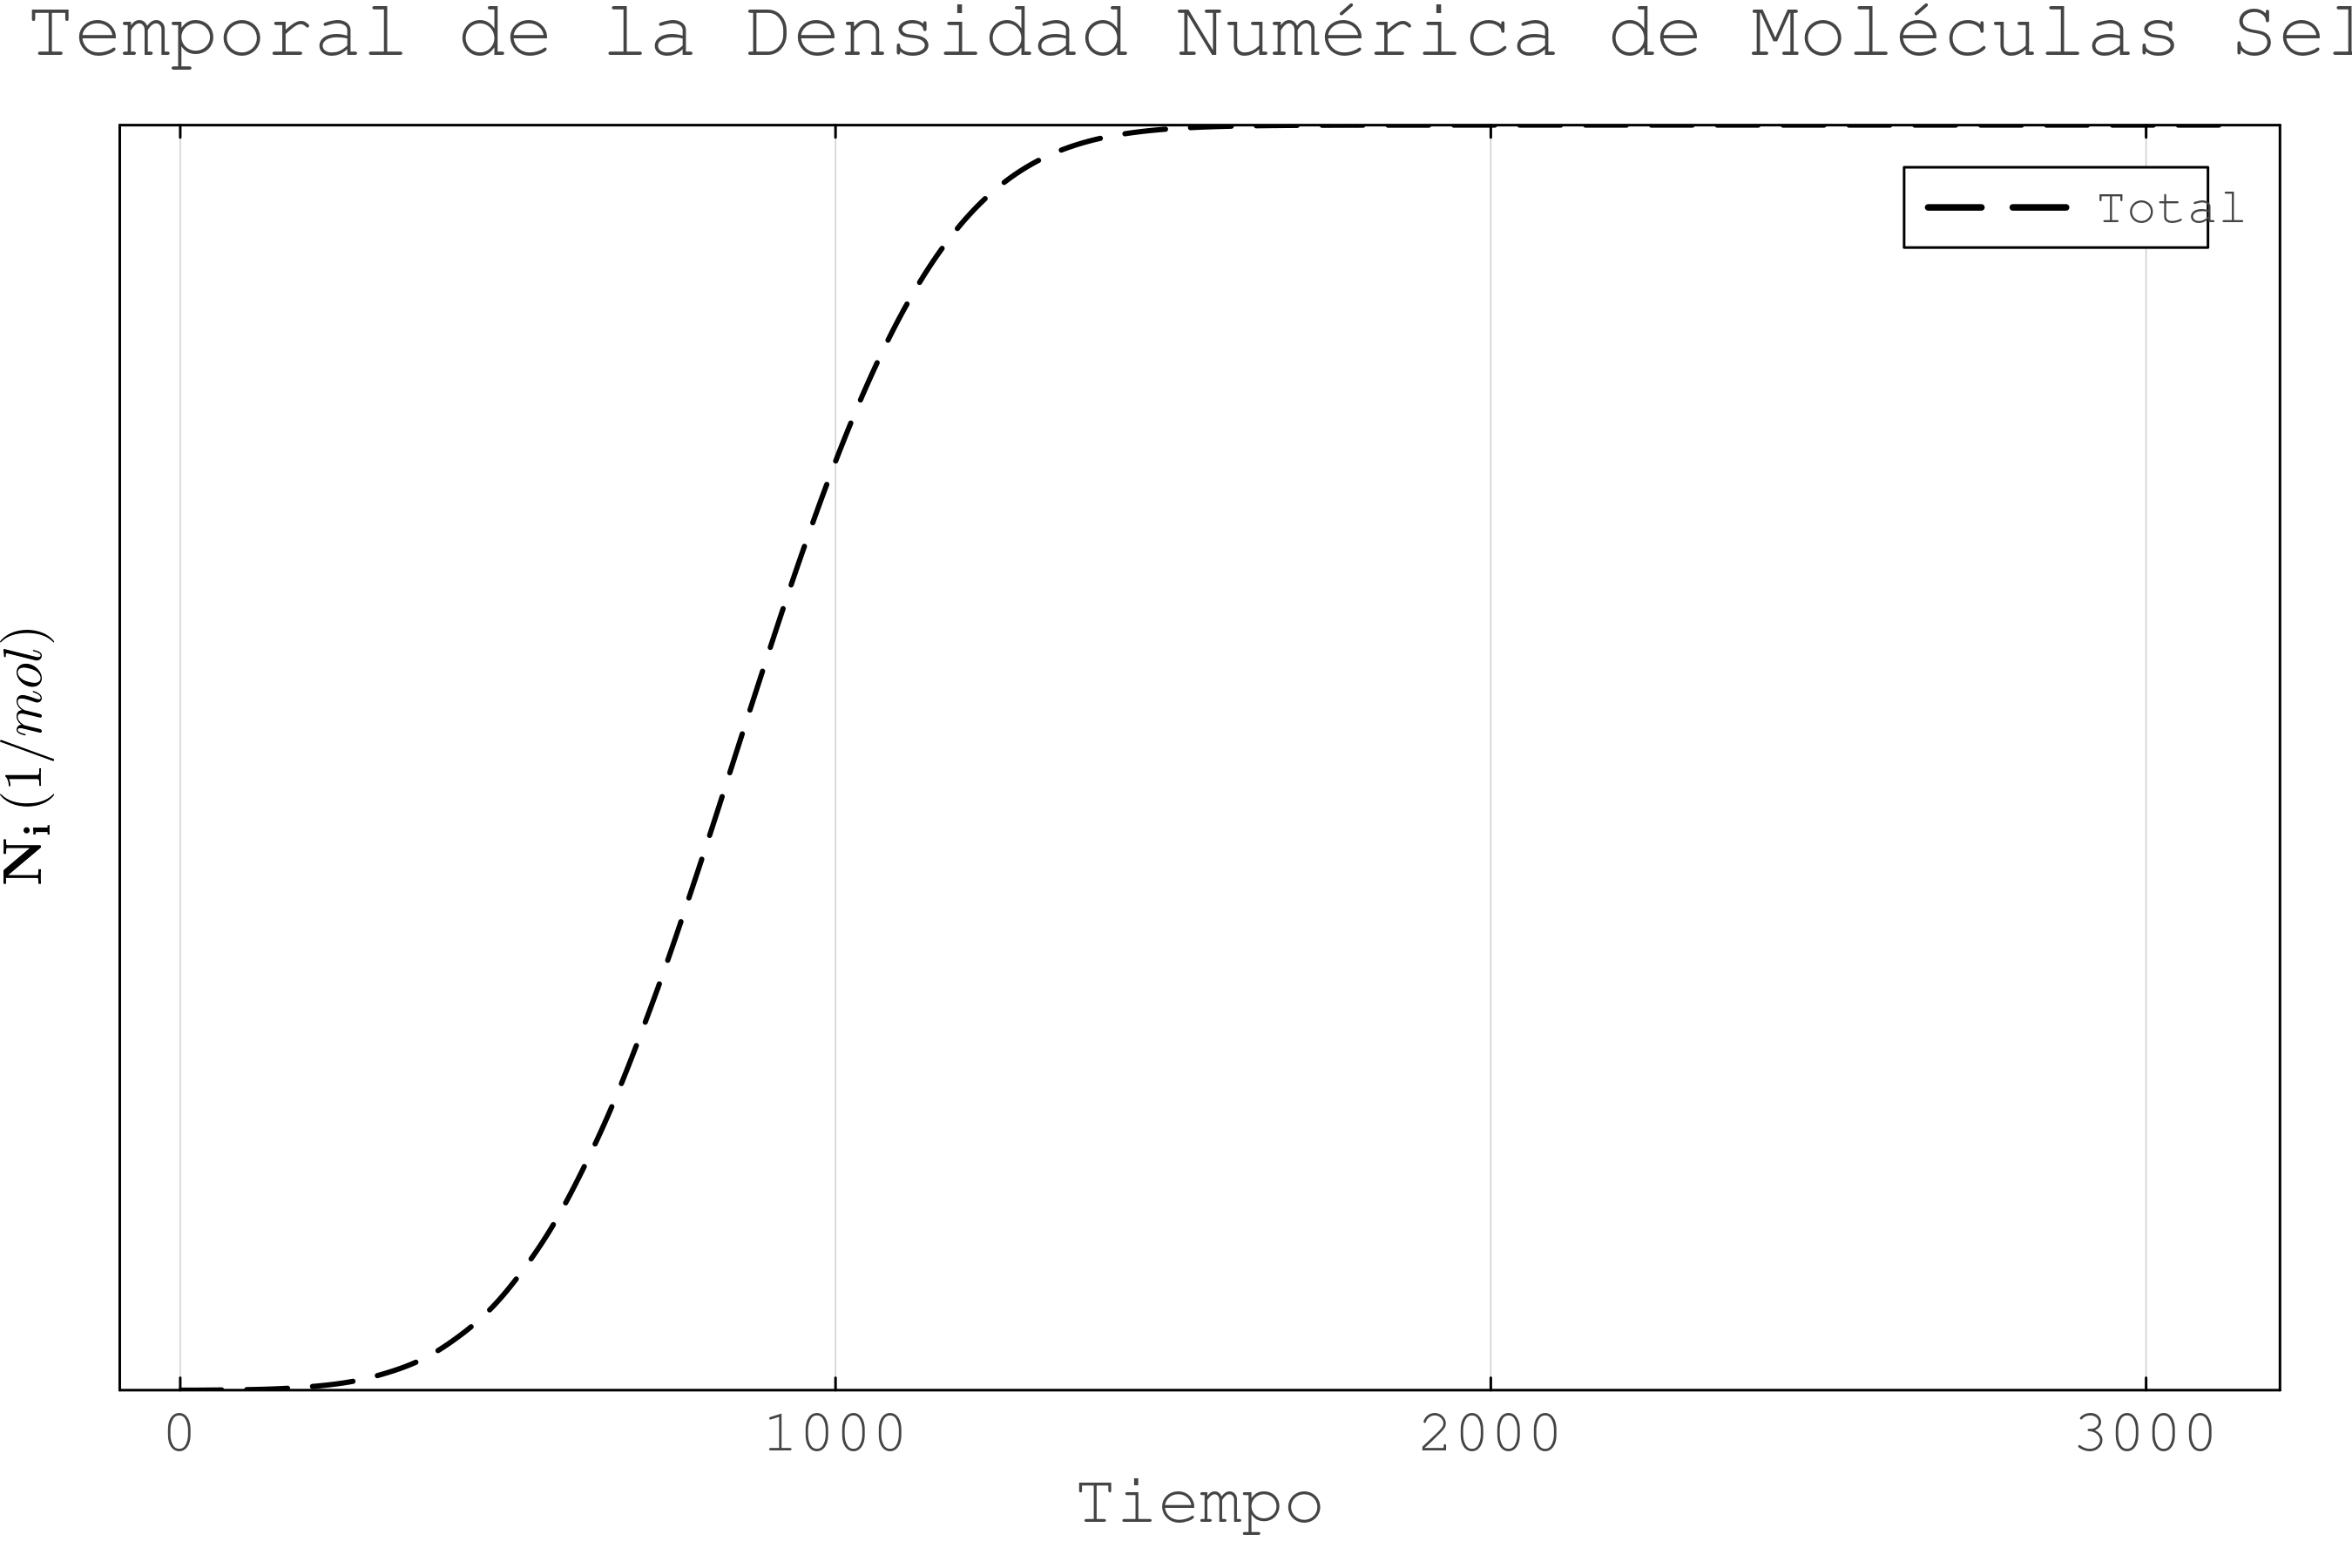

In [17]:
using Plots
using LaTeXStrings

# Asegúrate de que tienes definidos `solution`, `density_equilibrium`, y `MAX_NUMBER_MOLECULES`.

gr(size=(900, 600))  # Establece el backend de Plots y el tamaño del gráfico

# Selecciona un rango de números de moléculas equiespaciados
num_molecules_to_plot = 2:10:MAX_NUMBER_MOLECULES  # Ajusta el paso según la densidad deseada

# Define el eje del tiempo basado en las dimensiones de tu solución
time_steps = size(solution, 2)
tiempo = collect(1:time_steps)

# Establece colores para cada número de moléculas seleccionado
colores = palette(:viridis, length(num_molecules_to_plot))

# Ajustes de estilo global para las gráficas
default(
    framestyle=:box,
    legend=:topright,
    line=(:solid, 2),
    fontfamily="Latin Modern Roman",
    size=(900, 600),
    dpi=300,
    legendfontsize=10, titlefontsize=16, guidefontsize=14, tickfontsize=12,
    margin=5Plots.mm,
    xlabel="Tiempo",
    ylabel=L"\mathbf{N_i} \, (1/mol)",
    ylims=((total_evolution[1]),(total_evolution[end])),
    yticks=10.0 .^ (21:0.2:21),
    yscale = :log10,
    title="Evolución Temporal de la Densidad Numérica de Moléculas Seleccionadas"
)

# Inicia la gráfica (puede ser necesario ajustar según tus datos)
p = plot(legend=:topleft)

total_evolution = sum(solution[2:end,:], dims=1)

plot(tiempo, [total_evolution[t] for t in tiempo], label="Total", color=:black, linestyle=:dash)

# Ajustes finales y mostrar la gráfica
plot!(xlabel="Tiempo", ylabel=L"\mathbf{N_i} \, (1/mol)", title="Evolución Temporal de la Densidad Numérica de Moléculas Seleccionadas", legendfontsize=10, guidefontsize=14, tickfontsize=12)


In [10]:
time = solution.t

3111-element Vector{Float64}:
      0.0
      0.002320301290220726
      0.02552331419242798
      0.2575534432145005
      2.5778547334352258
     25.78086763564248
    257.810996657715
   2578.11228687844
  25781.12518908569
 257811.2542111582
      ⋮
      1.4936756885914722e21
      1.8865909974775014e21
      2.8483753409494883e21
      5.770363962667787e21
      2.0193910543447816e22
      1.1271989380699439e23
      6.832655458808198e23
      3.5672735727529904e24
      1.0e25

In [11]:
surface(time, number_molecules_array, solution, xlabel="Time", ylabel="Number of Molecules", zlabel="Number Density", title="Number Density Evolution")

ErrorException: Cannot convert ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}}, false}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}, SciMLBase.StandardODEProblem}, Rodas4{1, true, Nothing, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Val{:forward}, true, nothing}, OrdinaryDiffEq.InterpolationData{ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}}, false}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Nothing, OrdinaryDiffEq.Rodas4Cache{Vector{Float64}, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Matrix{Float64}, OrdinaryDiffEq.RodasTableau{Float64, Float64}, SciMLBase.TimeGradientWrapper{true, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}}, false}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Vector{Float64}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}}, SciMLBase.UJacobianWrapper{true, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}}, false}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Float64, Tuple{Vector{Float64}, Vector{Float64}, Float64, String}}, LinearSolve.LinearCache{Matrix{Float64}, Vector{Float64}, Vector{Float64}, SciMLBase.NullParameters, LinearSolve.DefaultLinearSolver, LinearSolve.DefaultLinearSolverInit{LinearAlgebra.LU{Float64, Matrix{Float64}, Vector{Int64}}, LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}, Matrix{Float64}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, LinearAlgebra.LU{Float64, Matrix{Float64}, Vector{Int64}}, Tuple{LinearAlgebra.LU{Float64, Matrix{Float64}, Vector{Int64}}, Vector{Int64}}, Nothing, Nothing, Nothing, LinearAlgebra.SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}, Tuple{LinearAlgebra.LU{Float64, Matrix{Float64}, Vector{Int32}}, Base.RefValue{Int32}}, Tuple{LinearAlgebra.LU{Float64, Matrix{Float64}, Vector{Int64}}, Base.RefValue{Int64}}, LinearAlgebra.QRPivoted{Float64, Matrix{Float64}, Vector{Float64}, Vector{Int64}}, Krylov.CraigmrSolver{Float64, Float64, Vector{Float64}}, Krylov.LsmrSolver{Float64, Float64, Vector{Float64}}}, LinearSolve.InvPreconditioner{LinearAlgebra.Diagonal{Float64, Vector{Float64}}}, LinearAlgebra.Diagonal{Float64, Vector{Float64}}, Float64, Bool}, ForwardColorJacCache{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Vector{Vector{Tuple{Float64}}}, UnitRange{Int64}, Nothing}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Float64, Rodas4{1, true, Nothing, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Val{:forward}, true, nothing}}, Nothing}, SciMLBase.DEStats, Nothing} to series data for plotting

┌ Warning: Invalid negative or zero value 0.0 found at series index 367 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


┌ Warning: Invalid negative or zero value 0.0 found at series index 367 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


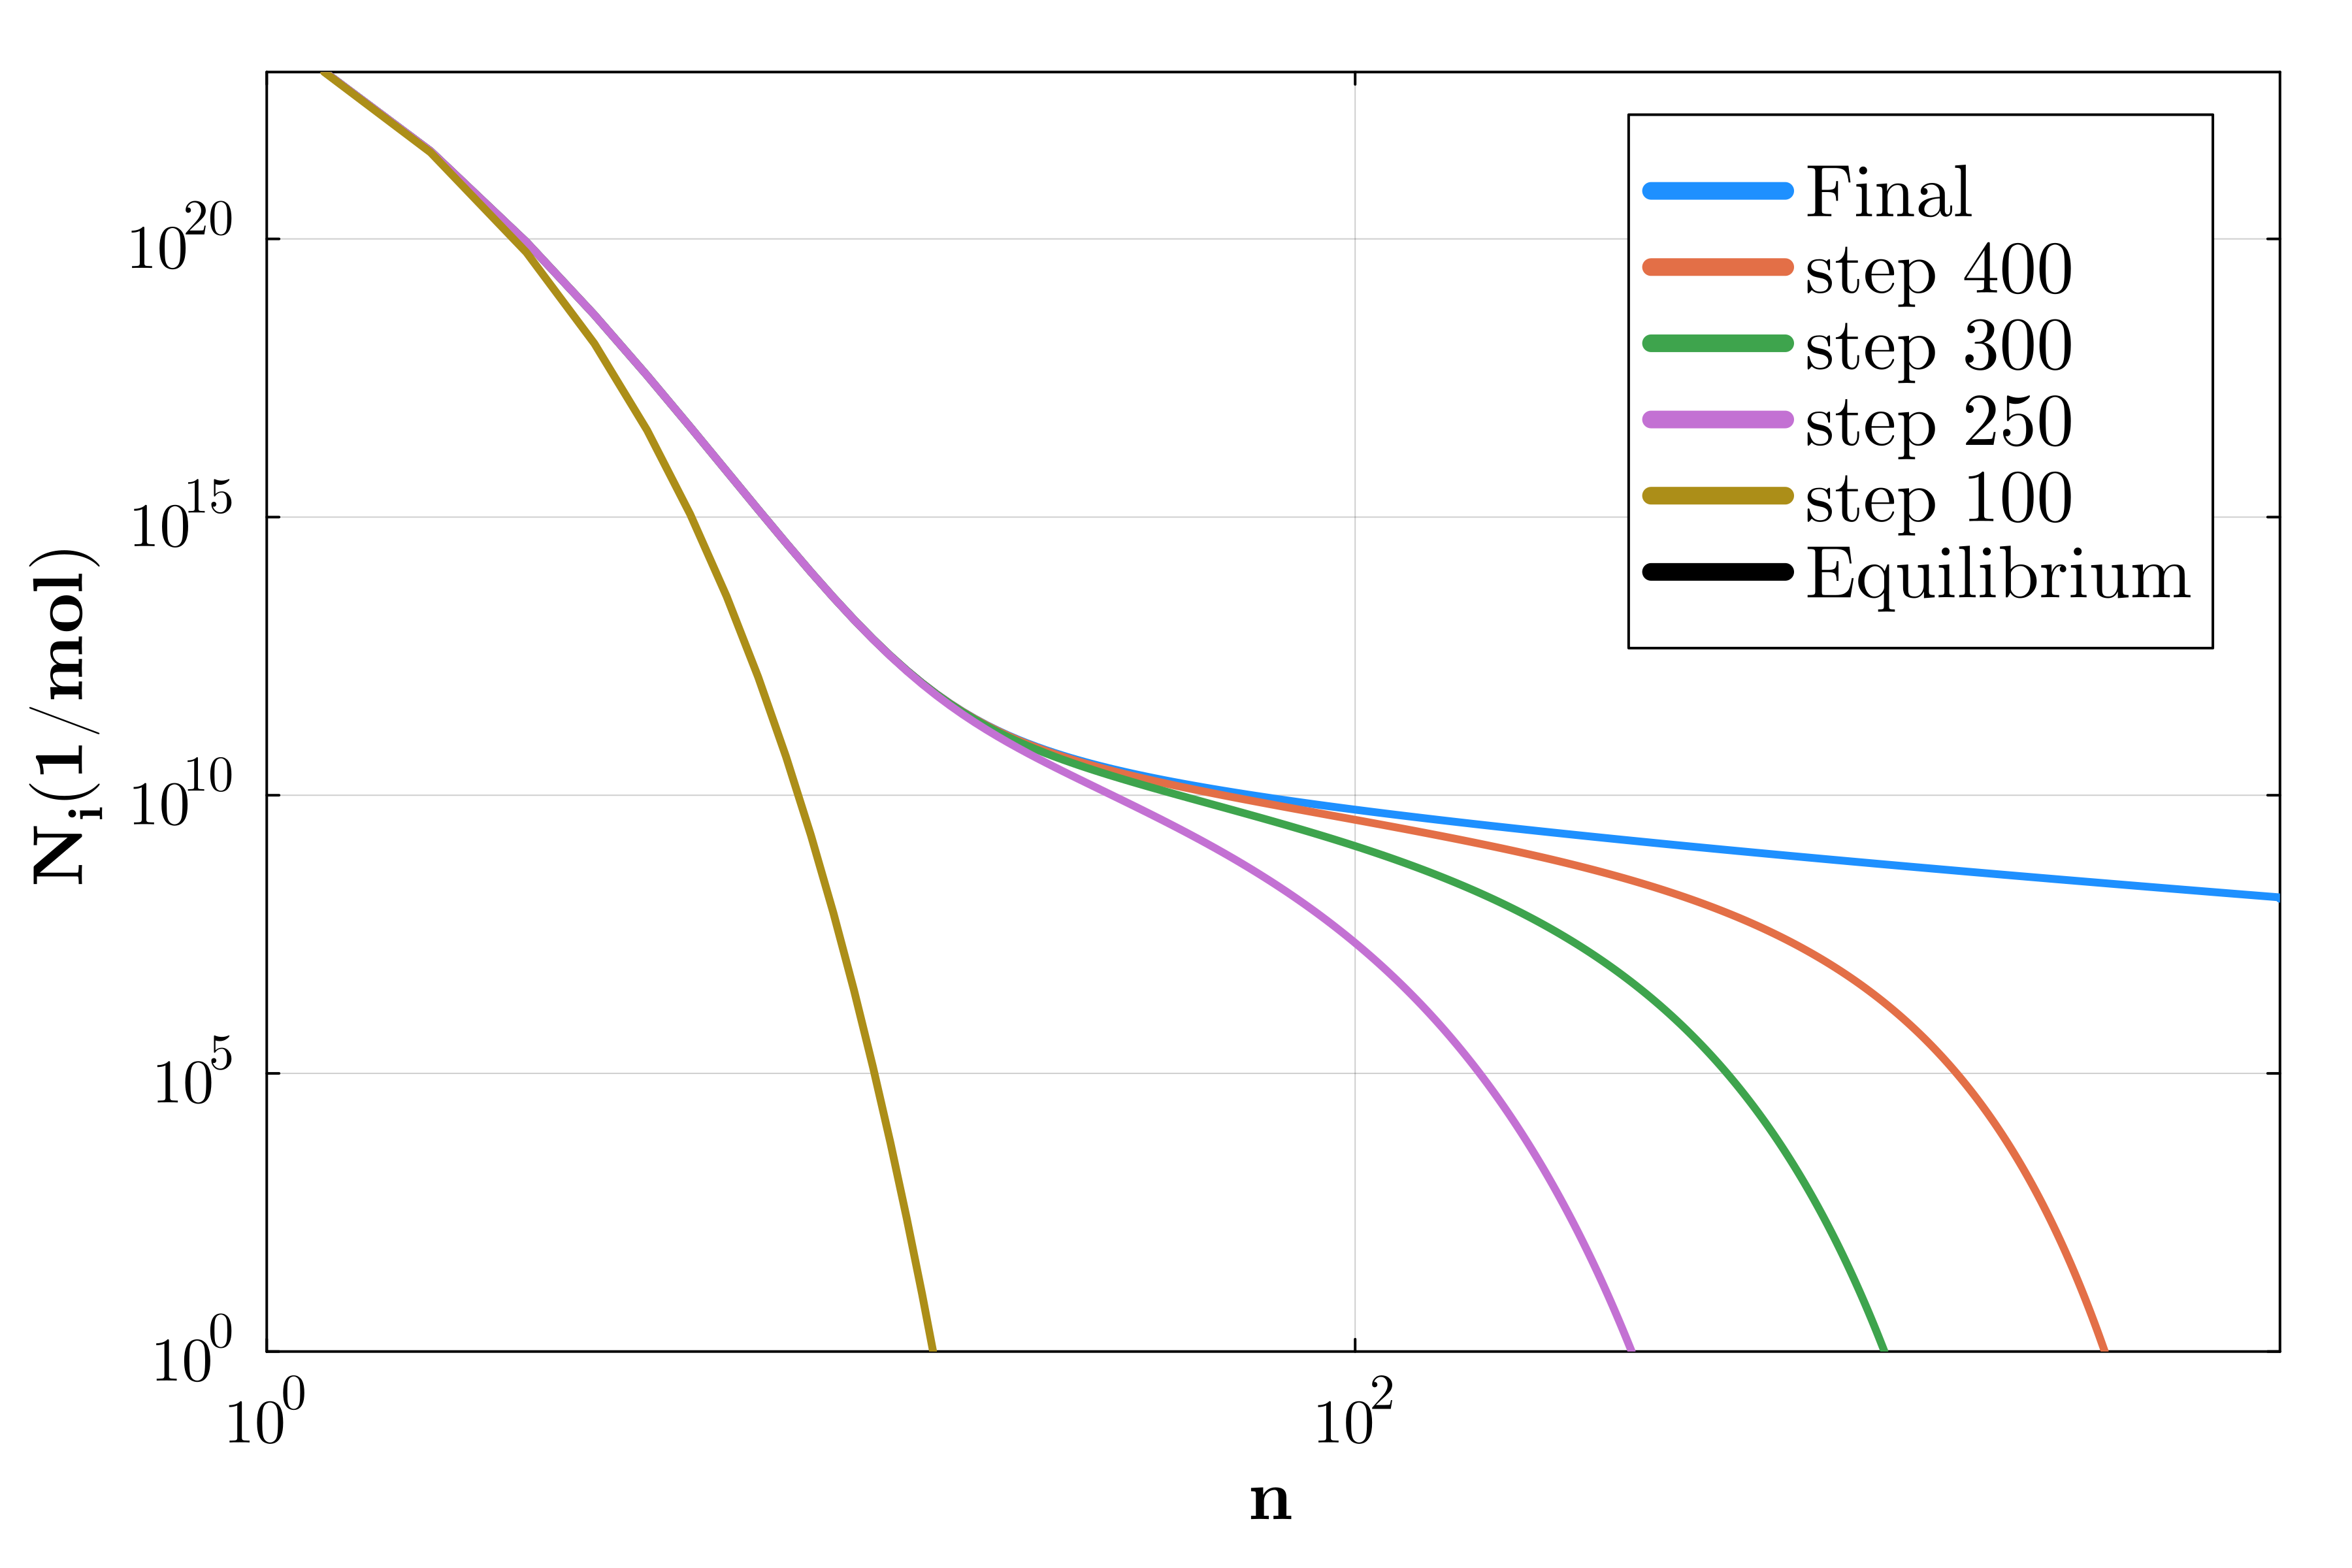

┌ Warning: Invalid negative or zero value 0.0 found at series index 367 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


In [8]:
using Plots
# Asegúrate de tener LaTeXStrings para usar LaTeX en etiquetas y títulos
using LaTeXStrings

# Establece el backend y el tamaño del gráfico
gr(size=(000, 600))

number_molecules_array = collect(1:MAX_NUMBER_MOLECULES)

# Define colores más atractivos
colores = [:dodgerblue, :coral]

# Ajustes de estilo global para las gráficas
default(
    framestyle=:box,
    legend=:topright,
    line=(:solid, 3),  # Aumenta el grosor de las líneas
    fontfamily="Computer Modern",  # Esto es lo más cercano a un estilo LaTeX clásico
    size=(900, 600),  # Ajusta el tamaño de la gráfica aquí si no se ajustó antes
    dpi=400
)


# Escala de los ejes y etiquetas en formato LaTeX con un tamaño de fuente más grande
plot(number_molecules_array, solution[:, end], yscale=:log10, xscale=:log10, label="Final",
    xlims=(1, MAX_NUMBER_MOLECULES+5), ylims=(1,1e23), yticks=10.0 .^ (-20:5:20),
    legendfontsize=12, titlefontsize=14, guidefontsize=12, tickfontsize=10,
    margin=5Plots.mm,
    color=colores[1])

plot!(number_molecules_array, solution[:, 350], yscale=:log10, label="step 400",
)


plot!(number_molecules_array, solution[:, 300], yscale=:log10, label="step 300",
)
    
plot!(number_molecules_array, solution[:, 250], yscale=:log10, label="step 250",
)
 
plot!(number_molecules_array, solution[:, 100], yscale=:log10, label="step 100",
)

plot!(number_molecules_array, density_equilibrium, yscale=:log10, label="Equilibrium",color = :black, linestyle=:dash,
)

# Personalizar aún más con LaTeXStrings si es necesario
plot!(xlabel=L"\mathbf{n}", ylabel=L"\mathbf{N_i (1/mol)}",
      legendfontsize=18, guidefontsize=18, tickfontsize=15)

# Mostrar el gráfico


┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


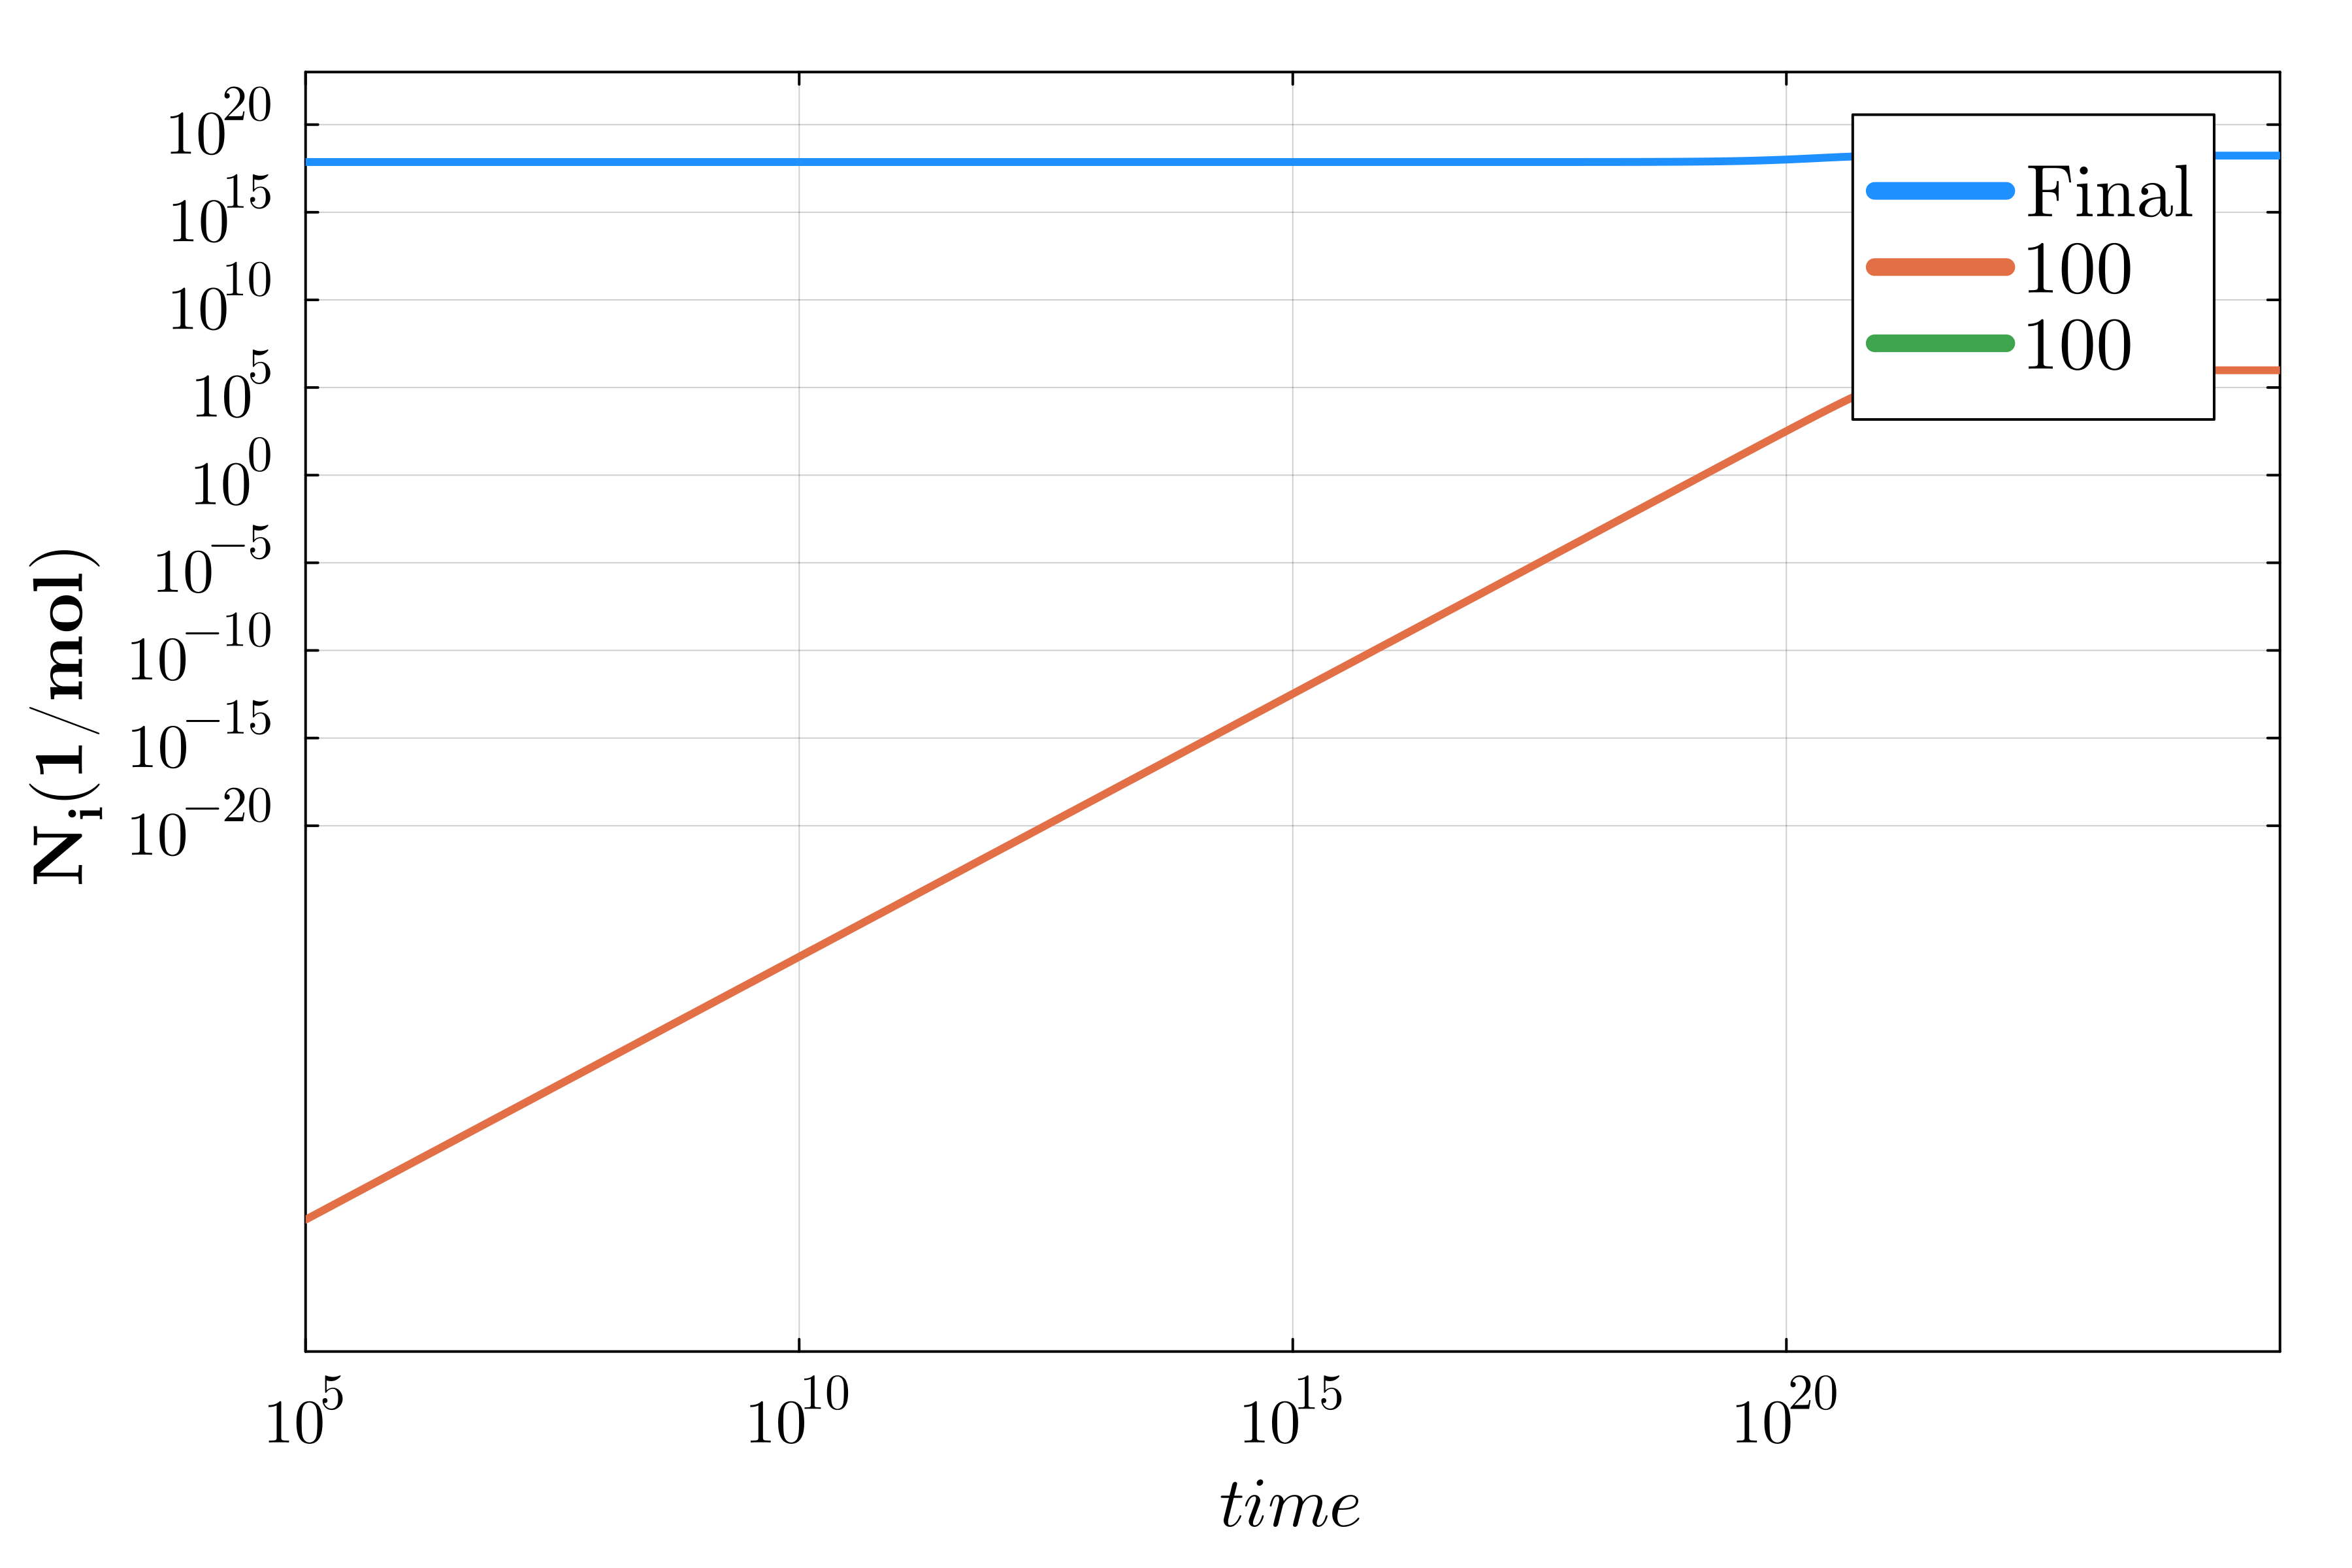

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /home/alexandre_sureda/.julia/packages/Plots/HyyIK/src/utils.jl:106


In [17]:
using Plots
# Asegúrate de tener LaTeXStrings para usar LaTeX en etiquetas y títulos
using LaTeXStrings

# Establece el backend y el tamaño del gráfico
gr(size=(000, 600))

number_molecules_array = collect(1:MAX_NUMBER_MOLECULES)

# Define colores más atractivos
colores = [:dodgerblue, :coral]

# Ajustes de estilo global para las gráficas
default(
    framestyle=:box,
    legend=:topright,
    line=(:solid, 3),  # Aumenta el grosor de las líneas
    fontfamily="Computer Modern",  # Esto es lo más cercano a un estilo LaTeX clásico
    size=(900, 600),  # Ajusta el tamaño de la gráfica aquí si no se ajustó antes
    dpi=400
)


# Escala de los ejes y etiquetas en formato LaTeX con un tamaño de fuente más grande
plot(solution.t[2:end], solution[2, 2:end],  yscale=:log10,xscale=:log10, label="Final",
    ylims=(1e-50,1e23),xlims = (1e5,1e25) ,yticks=10.0 .^ (-20:5:20), xticks=10.0 .^ (-20:5:20),
    legendfontsize=12, titlefontsize=14, guidefontsize=12, tickfontsize=10,
    margin=5Plots.mm,
    color=colores[1])

plot!(solution.t[2:end], solution[5, 2:end], yscale=:log10, label="100",
)
    
plot!(solution.t[2:end], solution[100, 2:end], yscale=:log10, label="100",
)

# Personalizar aún más con LaTeXStrings si es necesario
plot!(xlabel=L"time", ylabel=L"\mathbf{N_i (1/mol)}",
      legendfontsize=18, guidefontsize=18, tickfontsize=15)

# Mostrar el gráfico
